# Apify Pricing

Apify is a platform for web scraping. It lets developers and companies automate manual workflows they usually do on the web. Customers are able to use one of 200+ ready-made tools for web scraping and web automation to scrape web pages, e-commerce platforms, mobile apps, social media, and other websites.  __At least, it's what claimed on the Apify website.__

All of these tools which are called __actors__ in Apify Store fall into one of these three pricing models:

__Free__ - you can run the actor freely and you only pay for platform usage the actor generates.

__Paid__ - same as free, but in order to be able to run the actor after the trial period, you need to rent the actor from the developer and pay a flat monthly fee on the top of the platform usage the actor generates.

__Paid per result__ - you do not pay for platform usage the actor generates and only pay for the results it produces.

You can find more details about the pricing models through the following link: https://docs.apify.com/platform/actors/running/actors-in-store

### Aim

In this case, we find out which one of the the pricing models: __Paid__ , __Paid per result__ and __Free__ in this platform, generated more profit. To analyse the data and display the result, we use Multivariate regression in supervised machine learning. It is an extension of multiple regression with one dependent variable and multiple independent variables. Based on the number of independent variables, we try to predict the output.

We analyze the usage of the platform in __USD__ based on the two required features: __Compute Unit__ and __Dataset Items Count__ and compare the amount of profit generated in each of these two variables.

### Data

****The data used in this projected was provided by the Apify data team lead, during the job interview.****

### Libraries Used

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.metrics import r2_score
from pylab import *
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Loading the Data

In [16]:
df = pd.read_csv('actor_runs_2023.csv')

### Sample Data

In [17]:
df.head()
# x1 => run_id        x
# x2 => user_id     y
# x3 => actor_id z
# x4 => build_id
# x5 => started_at
# x6 => finished_at
# x7 => status
# x8 => usage_key_value_store_reads
# x9 => usage_key_value_store_writes
#.
#.
#.
# x17 => usage_compute_units
# x18 => dataset_items_count
# x19 => total_platform_usage_usd 
# y = a1 * x1 + a2 * x2 + a3 * x3 + 

,run_id,user_id,actor_id,build_id,started_at,finished_at,status,usage_key_value_store_reads,usage_key_value_store_writes,usage_key_value_store_lists,usage_request_queue_reads,usage_request_queue_writes,usage_dataset_reads,usage_dataset_writes,usage_residential_proxy_transfer_bytes,usage_proxy_serps,usage_compute_units,dataset_items_count,total_platform_usage_usd
0,Re6S1iNa9VakoMgaR,vmNDHzHvi8srXSbk8,m1NPxIieJaZd9UhP6,Mi8kbH6PMC65ZmuvV,2023-03-16T11:12:02.824Z,2023-03-16T11:12:22.534Z,SUCCEEDED,1,1,0,0,0,0,28,0,0,0.001357,28,0.000534
1,c0NvWUPZEXI3jDRC7,WYC4rsszWSw5iCkkW,bf54TfrKoJrQZsrZm,Mnsb9UmkTtab7oMFG,2023-03-16T12:25:10.06Z,2023-03-16T12:25:13.708Z,FAILED,1,1,0,0,0,0,0,0,0,0.001906,0,0.000532
2,7Ta0QDxg8gQChzKnF,Z9JpDf74uHecET97E,9Sk4JJhEma9vBKqrg,kqMNhAaZCiyxawUns,2023-03-16T19:39:03.889Z,2023-03-16T19:40:08.04Z,SUCCEEDED,1,11,0,14,73,0,10,0,0,0.071098,0,0.020086
3,IR4pAPViSQcu39Yws,Wb79moXaBTjTo3ieC,YPh5JENjSSR6vBf2E,WmEnXz3WBxfEaM6Ko,2023-03-16T17:17:20.111Z,2023-03-16T17:17:29.662Z,SUCCEEDED,1,2,0,1,2,0,1,0,0,0.005203,0,0.001461
4,YqBVQQN5emULPxBuL,pqQB4FWGoS8nsfMoo,moJRLRc85AitArpNN,VezLeaxKZT0ZmuguN,2023-03-16T16:47:55.406Z,2023-03-16T16:48:07.312Z,SUCCEEDED,1,4,0,8,2,0,1,0,1,0.001630,1,0.003703


### Plot of 'Platform Usage in USD' vs. 'CU' and 'Dataset Items'

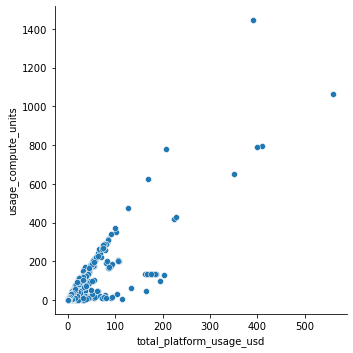

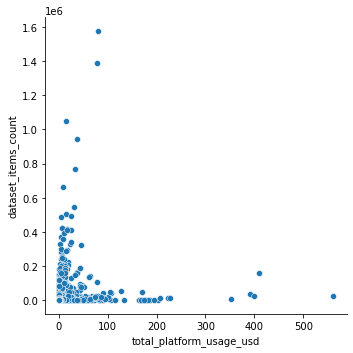

In [18]:
sns.relplot(x='total_platform_usage_usd', y = 'usage_compute_units', data = df )
sns.relplot(x='total_platform_usage_usd', y = 'dataset_items_count', data = df )
# this is just to show there is no correlation on one variables

### Observation

We can observe that there is a multivariate regression between total_platform_usage_usd and dataset_items_count and usage_compute_units. In the dataset we can see when usage_compute_units increases, total_platform_usage_usd increases as well. But, when dataset_items_count increases, the total_platform_usage-usd has a polynomial regression and not neccessarily increases.

### MultiVariate Function:

We drop some of the columns which are not nominal as the function will have an error to have a combination of float and string.

In [25]:
# Setting the X and y
X = df.drop(columns= ['total_platform_usage_usd', 'usage_proxy_serps', 'build_id', 'run_id', 'user_id', 'started_at', 'finished_at', 'status', 'actor_id']) # X => Feature df
y = df['total_platform_usage_usd'] # tagert
X.head() # Feture

,usage_key_value_store_reads,usage_key_value_store_writes,usage_key_value_store_lists,usage_request_queue_reads,usage_request_queue_writes,usage_dataset_reads,usage_dataset_writes,usage_residential_proxy_transfer_bytes,usage_compute_units,dataset_items_count
0,1,1,0,0,0,0,28,0,0.001357,28
1,1,1,0,0,0,0,0,0,0.001906,0
2,1,11,0,14,73,0,10,0,0.071098,0
3,1,2,0,1,2,0,1,0,0.005203,0
4,1,4,0,8,2,0,1,0,0.001630,1


### Testing the Dataset

To test the dataset we created four variables to train and then test the created function. 
We chose the test size equal to 20 percent. 

In [26]:
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size =.2, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # This is just the library not simple liner regression 
regressor.fit (X_train, y_train) # Training

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test) # Test on previously not seen dataset

results = pd.DataFrame({'Actual' :y_test, 'Predicted': y_pred}) # Creating a comaprsion Table

In [29]:
results.head() # only display first 5

,Actual,Predicted
1348815,0.003862,0.001596
4438721,0.017274,0.043365
4519922,0.006635,0.005133
4527259,0.001924,0.001848
2429339,0.007755,0.012183


### R2 Score

R is the accuracy of the algoritm, which in this case is a good number because it is close to 1.

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.9122665509540744

## Conclusion

In __Usage Compute Units__ pricing model, most consumers used the free pricing model and up to 100 dollars which can also be fixed pricing. The usage was decreasing for more expensive pricing.
In __Dataset Items Count__ pricing model, the consumers were charged even if they didn't use the CPU and memory resources consumed by the Actor.

Apify's website and pricing plans are not straightforward without evident and consumer-friendly pricing descriptions; therefore, any improvement in the process of this project is welcomed.